In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (11.5, 8.5)

Будем работать с pairwise подходом. Используем данные о парах фильмах. Значение 1 целевой переменной означает, что был выбран фильм 1, а 0 - что фильм 2.

In [4]:
events_data = pd.read_csv('movie_events_pairwise-linear.csv')

In [5]:
events_data.head()

,Action_1,Adventure_1,Animation_1,Children's_1,Comedy_1,Crime_1,Documentary_1,Drama_1,Fantasy_1,Film-Noir_1,...,Sci-Fi_2,Thriller_2,War_2,Western_2,price_2,ratings_average_2,ratings_count_2,release_date_2,unknown_2,outcome
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.283637,-0.097012,-0.727633,0.393978,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.283637,0.631766,0.242825,-0.307809,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.283637,0.094165,0.342360,0.534335,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.837803,-2.016128,-0.665424,0.393978,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-2.368163,-2.655833,-0.727633,0.183442,0.0,0.0


In [6]:
events_data.columns

Index(['Action_1', 'Adventure_1', 'Animation_1', 'Children's_1', 'Comedy_1',
       'Crime_1', 'Documentary_1', 'Drama_1', 'Fantasy_1', 'Film-Noir_1',
       'Horror_1', 'Musical_1', 'Mystery_1', 'Romance_1', 'Sci-Fi_1',
       'Thriller_1', 'War_1', 'Western_1', 'price_1', 'ratings_average_1',
       'ratings_count_1', 'release_date_1', 'unknown_1', 'Action_2',
       'Adventure_2', 'Animation_2', 'Children's_2', 'Comedy_2', 'Crime_2',
       'Documentary_2', 'Drama_2', 'Fantasy_2', 'Film-Noir_2', 'Horror_2',
       'Musical_2', 'Mystery_2', 'Romance_2', 'Sci-Fi_2', 'Thriller_2',
       'War_2', 'Western_2', 'price_2', 'ratings_average_2', 'ratings_count_2',
       'release_date_2', 'unknown_2', 'outcome'],
      dtype='object')

In [7]:
events_data.shape

(132542, 47)

In [8]:
events_data['outcome'].value_counts()

0.0    66271
1.0    66271
Name: outcome, dtype: int64

## Задание 1

Разбейте выборку на train и test в отношении 4:1.

In [9]:
X = events_data.drop('outcome', axis=1)
y = events_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106033, 46), (26509, 46), (106033,), (26509,))

## Задание 2

Обучите логистическую регрессию.

In [11]:
model0 = LogisticRegression(random_state = 13)
model0.fit(X_train, y_train)

LogisticRegression(random_state=13)

## Задание 3

Сделайте предсказание для теста, измерьте качество с помощью AUC-ROC.

In [12]:
y_pred_proba = model0.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.7884402381361014

## Задание 4

Выведите важности признаков.

In [13]:
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(model0.coef_.reshape(-1))}) # или model0.coef_[0]
feature_importances

,feature,importance
0,Action_1,0.013756
1,Adventure_1,0.049947
2,Animation_1,0.015764
3,Children's_1,0.191539
4,Comedy_1,0.025568
5,Crime_1,0.053103
6,Documentary_1,0.036742
7,Drama_1,0.065165
8,Fantasy_1,0.160801
9,Film-Noir_1,0.615188


In [14]:
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
22,unknown_1,1.407184
45,unknown_2,1.311251
18,price_1,0.865667
41,price_2,0.821817
9,Film-Noir_1,0.615188
32,Film-Noir_2,0.606849
35,Mystery_2,0.219212
12,Mystery_1,0.215016
26,Children's_2,0.200473
3,Children's_1,0.191539


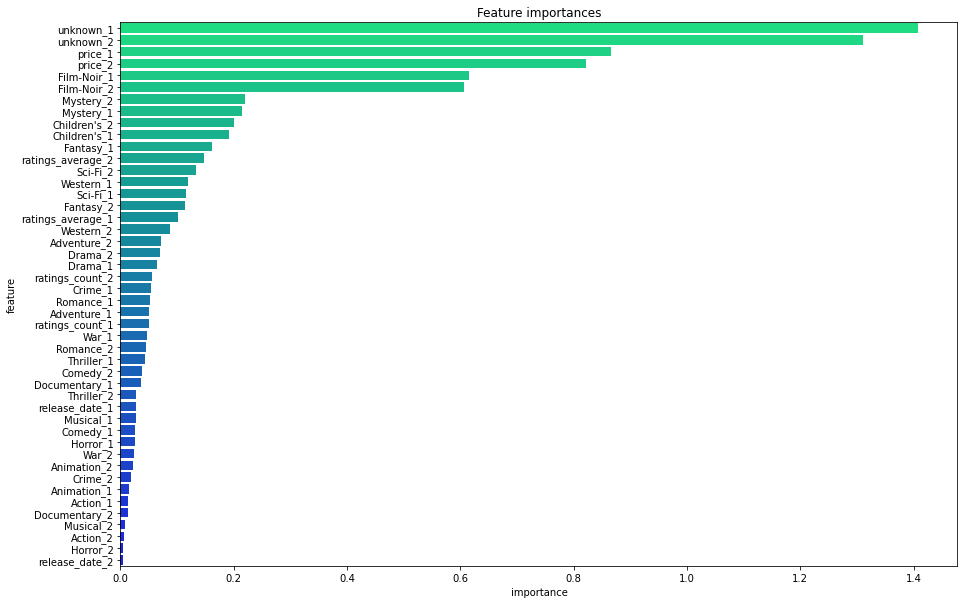

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importances, x='importance', y='feature', palette="winter_r")
plt.title('Feature importances')
plt.show()

## Задание 5

Постройте графики зависимости целевой переменной от двух самых важных признаков.

In [16]:
events_data.unknown_1.value_counts()

0.0    132476
1.0        66
Name: unknown_1, dtype: int64

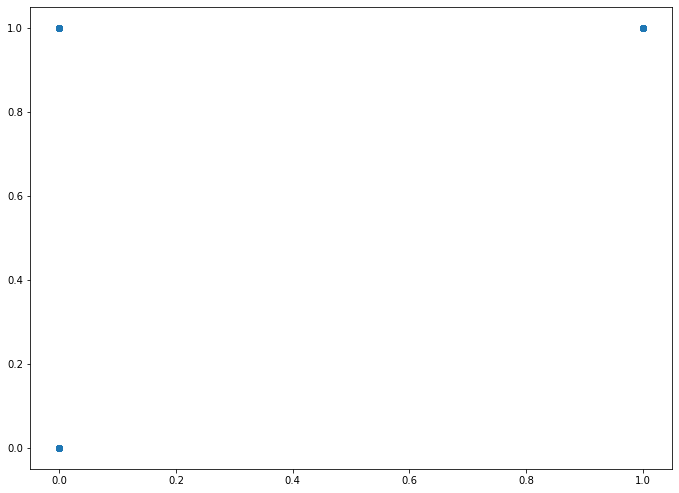

In [17]:
plt.scatter(events_data.unknown_1, events_data.outcome)
plt.show()

In [18]:
y_pred_proba

array([0.24948242, 0.40301775, 0.50673772, ..., 0.55081629, 0.91796063,
       0.38829454])

In [19]:
X_test['unknown_1'].value_counts()

0.0    26496
1.0       13
Name: unknown_1, dtype: int64

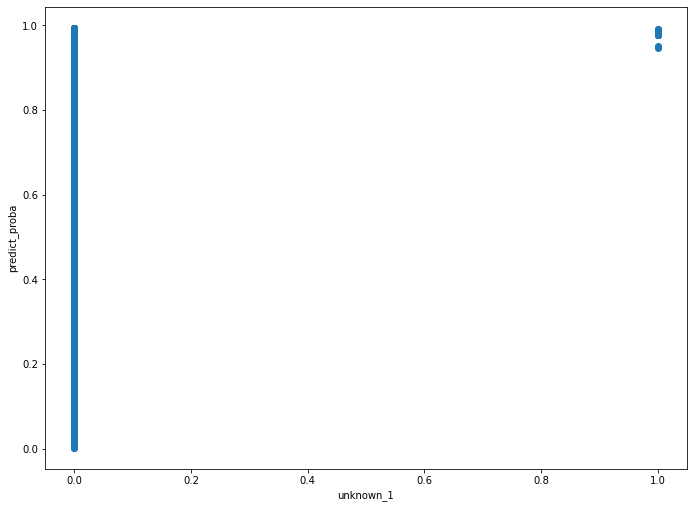

In [20]:
plt.scatter(X_test['unknown_1'], y_pred_proba)
plt.xlabel('unknown_1')
plt.ylabel('predict_proba')
plt.show()

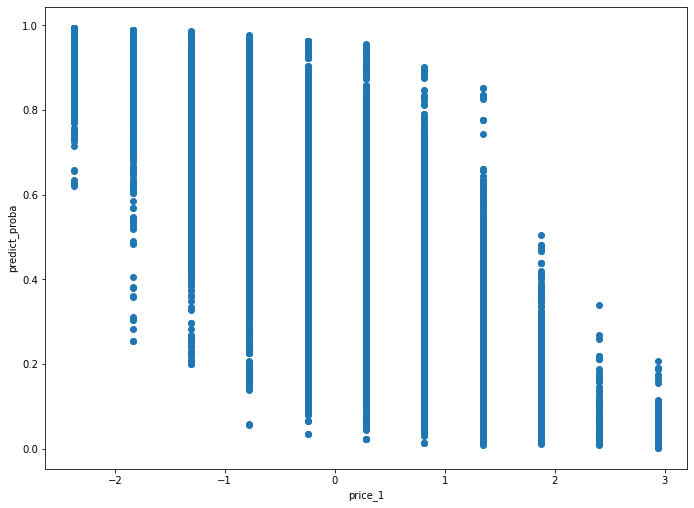

In [21]:
plt.scatter(X_test['price_1'], y_pred_proba)
plt.xlabel('price_1')
plt.ylabel('predict_proba')
plt.show()

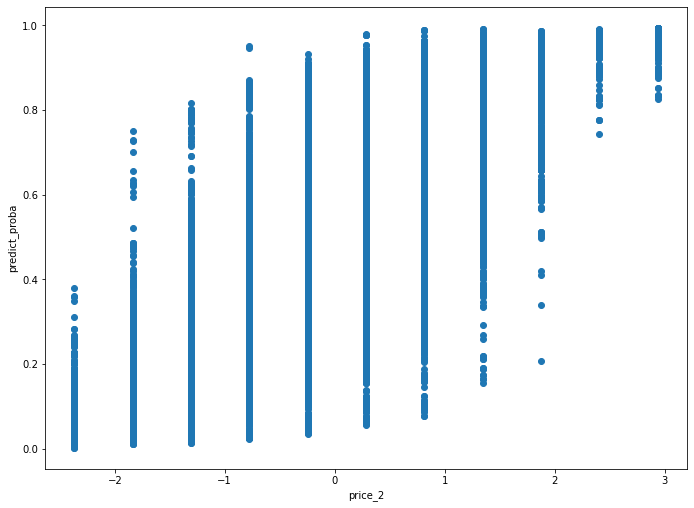

In [22]:
plt.scatter(X_test['price_2'], y_pred_proba)
plt.xlabel('price_2')
plt.ylabel('predict_proba')
plt.show()

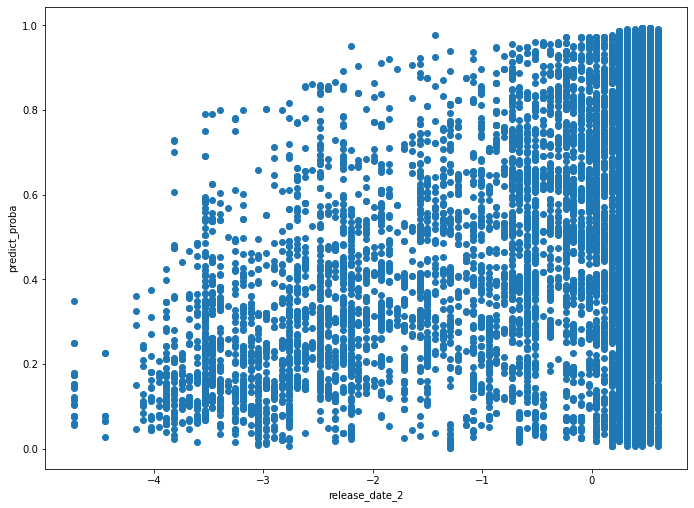

In [23]:
plt.scatter(X_test['release_date_2'], y_pred_proba)
plt.xlabel('release_date_2')
plt.ylabel('predict_proba')
plt.show()

## Задание 6

Проделайте то же самое, но со случайным лесом.

In [ ]:
# your code here

## Задание 7

Проделайте то же самое, но с градиентным бустингом.

In [ ]:
# your code here